# Games

In [1]:
using PGFPlots

## Traveler's Dilemma

Actions are the dollar amounts (\$2--\$100). A strategy is a distribution over these amounts, represented as a vector. 

In [2]:
const Action = Integer
const Strategy = Vector{Float64}
actions = collect(2:100)
normalize(a::Vector) = a / sum(a);

$U_i(a_i, a_{-i}) = \begin{cases}a_i & \text{if } a_i = a_{-i}\\ a_i +2 & \text{if } a_i < a_{-i}\\ a_{-i} - 2 & \text{if } a_i > a_{-i}\\\end{cases}$

In [3]:
function utility(own::Action, opponent::Action)
    if own == opponent
        return own
    elseif own < opponent
        return own + 2
    else
        return opponent - 2
    end
end;    

$U_i(a_i, \pi_{-i}) = \sum_{a_{-i}} \pi_{-i}(a_{-i})U(a_i, a_{-i})$

In [4]:
function utility(own::Action, opponent::Strategy)
    u = 0
    for i = 1:length(actions)
        u += opponent[i] * utility(own, actions[i])
    end
    u
end;

Quantal best response to opponent strategy $\pi_{-i}$ is 

$\pi_i(a_i) \propto \exp(\lambda U_i(a, \pi_{-i}))$

In [5]:
function quantalBestResponse(λ::Real, opponent::Strategy)
    s = Float64[exp(λ*utility(a, opponent)) for a in actions]
    normalize(s)
end;

In [6]:
function logitLevelK(k::Integer, λ::Real)
    if k == 0
        return normalize(ones(length(actions)))
    else
        return quantalBestResponse(λ, logitLevelK(k - 1, λ))
    end
end;        

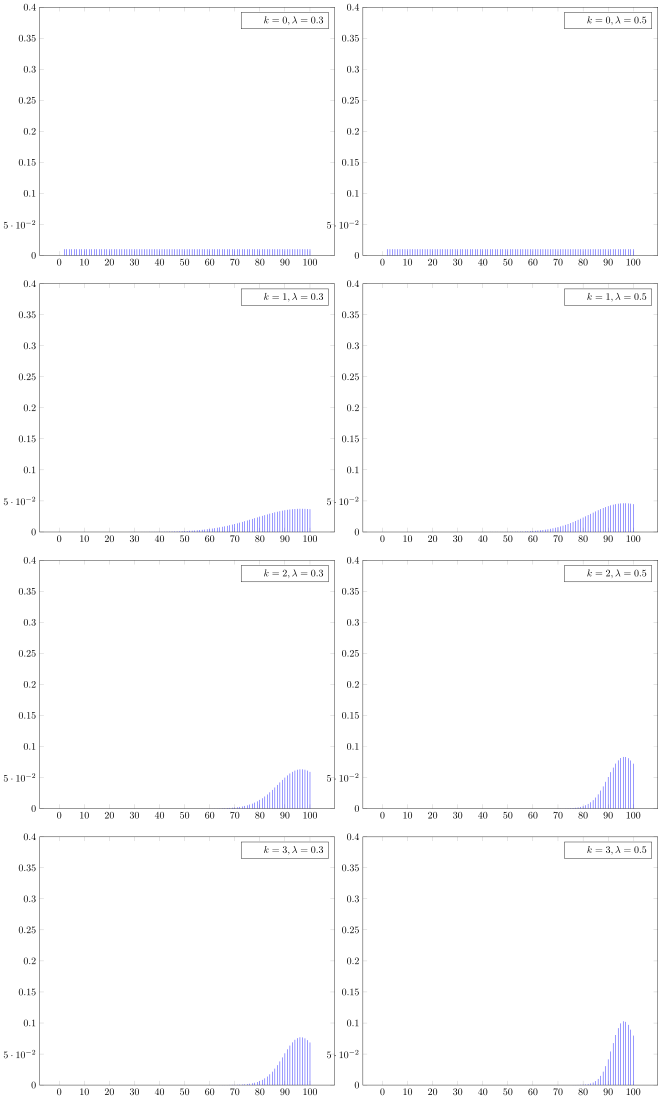

In [7]:
using Printf
g = GroupPlot(2,4)
lambdas = [0.3,0.5]
ks = 0:3
for k in ks
    for λ in lambdas
        title = Printf.@sprintf("{\$k = %d, \\lambda = %0.1f\$}", k, λ)
        p = Axis(Plots.Linear(actions, logitLevelK(k, λ), style="ycomb", mark="none", legendentry=title),ymin=0,ymax=0.4, width="12cm")
        push!(g, p)
    end
end
g